# Logistic Regression 

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from sklearn.datasets import make_blobs

from matplotlib import pyplot
import matplotlib.cm as cm
from random import sample

## Generating Some Example Data with 2 Features

In [17]:
n_feature = 2 # the number of features
n_components = 2 # the number of clusters

n=1000 # the number of total samples

In [28]:
# generate isotropic Gaussian blobs (data from mixture Gaussian distributions)
X, y = make_blobs(n_samples=n, # the number of total samples
                  centers=n_components, # the number of clusters
                  n_features=n_feature, # the number of features
                  cluster_std = [2] * n_components, # the std of each cluster
                  random_state=2) # 2

X

array([[  1.48353353,  -4.40144885],
       [ -1.23758026,  -7.65964033],
       [ -0.45189446, -11.5274518 ],
       ...,
       [ -1.08110343, -14.28992747],
       [ -2.05335352, -11.25063077],
       [  0.03402105,  -4.41756737]])

In [29]:
# Just to show you what is inside it. We print the first 10 elements of this numpy array. 
y[:10]

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

## Visualizing our example data

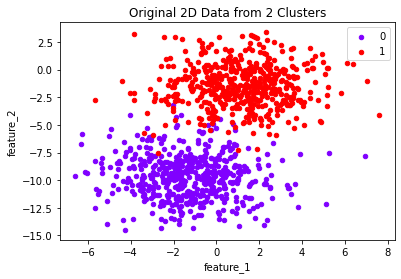

In [30]:
# scatter plot, data points annotated by different colors
df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=y))


cluster_name = set(y)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))
    
pyplot.title('Original 2D Data from {} Clusters'.format(n_components))
pyplot.show()

# Separate the data into Training and Test dataset 

In [31]:
# Create Test/Train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [32]:
## Building and Training a Logistic Regression Model 

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression( fit_intercept=True)
model.fit(X_train,y_train)



y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.985


## Classification Report

In [34]:
from sklearn.metrics import classification_report



print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       104
           1       0.99      0.98      0.98        96

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

